In [ ]:
!pip install scrapy

In [ ]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}


##**A. Looping through multiple pages**

One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.

Try for yourself! See how the URL changes as you go through multiple pages.

For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.
Okay, now let’s put this to work in a function:

In [ ]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

##**We can even add in a a stop condition. For this one, we can tell Python to look for a greyed out “Next Page” button. To identify this element, use the element inspector.**##

##**Add this to the bottom of the function above.**##


In [ ]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-128GB-Deep-Purple/product-reviews/B0BDJ6ZMCC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
reviews = pd.DataFrame(reviewlist)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15 October 2023
1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21 December 2022
2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2 November 2022
3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20 September 2022
4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nOverrated,Excellent phone but would not recommend to buy...,8 April 2023
96,4.0,4.0 out of 5 stars\nMore tweaked IPhone with l...,iPhone 14Pro is Blazing fast and does every ta...,9 February 2023
97,5.0,5.0 out of 5 stars\nAbout the device,I like the Device specially that floating notc...,14 July 2023
98,3.0,3.0 out of 5 stars\nIphone Vs Nokia????,I have used Iphones and also other android pho...,17 January 2023


In [ ]:
reviews.to_csv('reviews.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [ ]:
reviews = pd.read_csv('reviews.csv')
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15 October 2023
1,1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21 December 2022
2,2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2 November 2022
3,3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20 September 2022
4,4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17 October 2023
...,...,...,...,...,...
95,95,4.0,4.0 out of 5 stars\nOverrated,Excellent phone but would not recommend to buy...,8 April 2023
96,96,4.0,4.0 out of 5 stars\nMore tweaked IPhone with l...,iPhone 14Pro is Blazing fast and does every ta...,9 February 2023
97,97,5.0,5.0 out of 5 stars\nAbout the device,I like the Device specially that floating notc...,14 July 2023
98,98,3.0,3.0 out of 5 stars\nIphone Vs Nokia????,I have used Iphones and also other android pho...,17 January 2023


In [ ]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
reviews.Rating.describe()

count    100.000000
mean       4.380000
std        1.152774
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [ ]:
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15 October 2023
1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21 December 2022
2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2 November 2022
3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20 September 2022
4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nOverrated,Excellent phone but would not recommend to buy...,8 April 2023
96,4.0,4.0 out of 5 stars\nMore tweaked IPhone with l...,iPhone 14Pro is Blazing fast and does every ta...,9 February 2023
97,5.0,5.0 out of 5 stars\nAbout the device,I like the Device specially that floating notc...,14 July 2023
98,3.0,3.0 out of 5 stars\nIphone Vs Nokia????,I have used Iphones and also other android pho...,17 January 2023


In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     15
1     21
2      2
3     20
4     17
      ..
95     8
96     9
97    14
98    17
99    21
Name: Review_Date, Length: 100, dtype: object 
 0       October
1      December
2      November
3     September
4       October
        ...    
95        April
96     February
97         July
98      January
99      January
Name: Review_Date, Length: 100, dtype: object 
 0     2023
1     2022
2     2022
3     2022
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Name: Review_Date, Length: 100, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,15,October,2023
1,21,December,2022
2,2,November,2022
3,20,September,2022
4,17,October,2023
...,...,...,...
95,8,April,2023
96,9,February,2023
97,14,July,2023
98,17,January,2023


In [ ]:
df.Month.value_counts()

October      19
November     14
September    11
April        10
May           9
February      8
March         7
December      6
June          5
July          5
January       5
August        1
Name: Month, dtype: int64

In [ ]:
order={'Month':{'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,10
1,12
2,11
3,9
4,10
...,...
95,4
96,2
97,7
98,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       96 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    int64  
 6   Year         100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [ ]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15,10,2023
1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21,12,2022
2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2,11,2022
3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20,9,2022
4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17,10,2023


#**DATA VISUALIZATION**

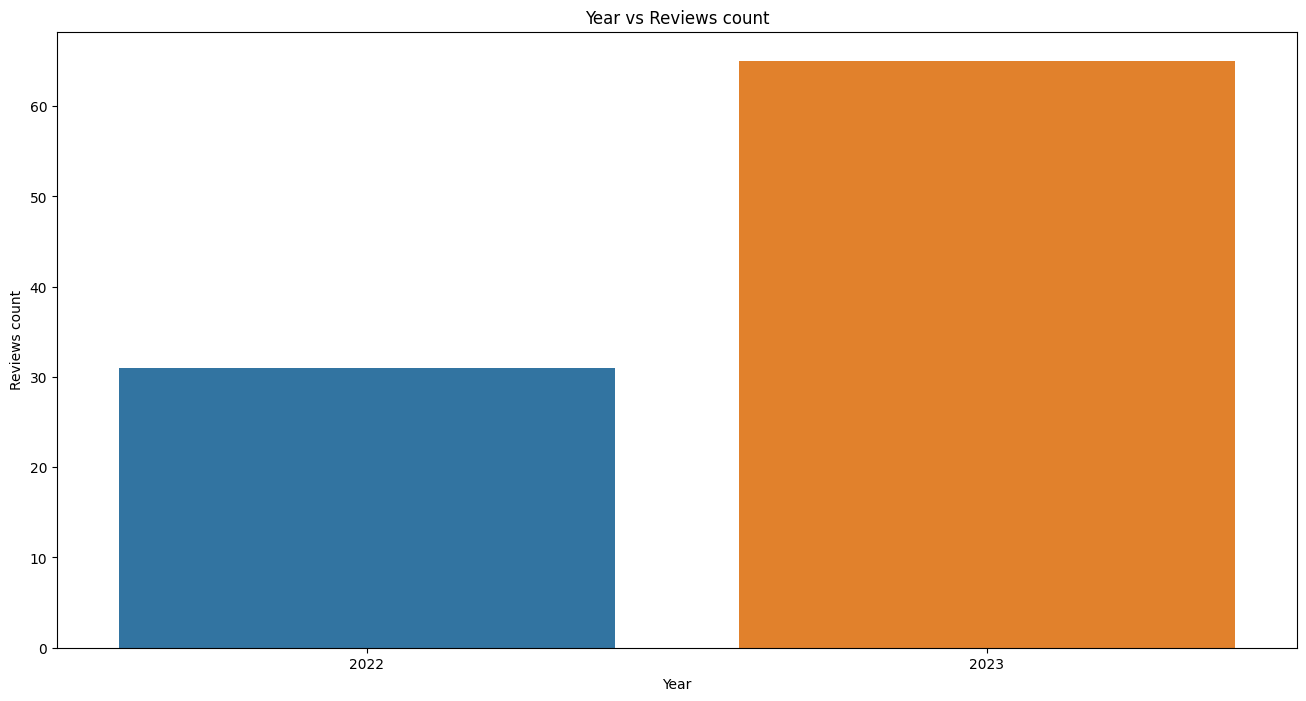

In [ ]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Year')['Review'].count()).reset_index()
dayreview['Year'] = dayreview['Year'].astype('int64')
dayreview.sort_values(by = ['Year'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Year", y = "Review", data = dayreview)
plt.title('Year vs Reviews count')
plt.xlabel('Year')
plt.ylabel('Reviews count')
plt.show()

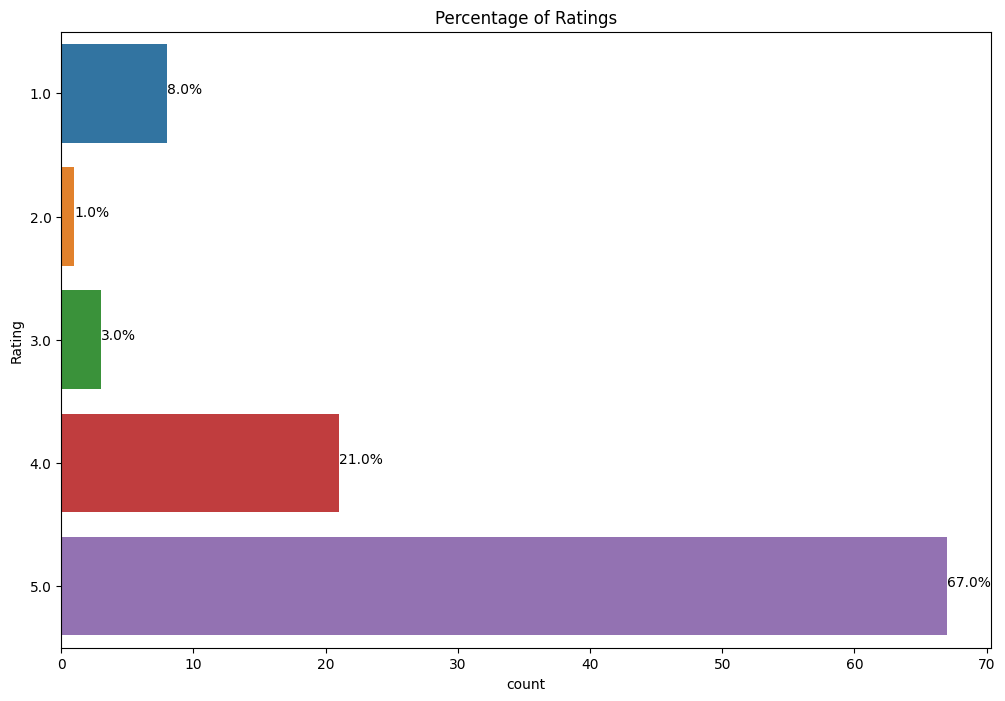

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

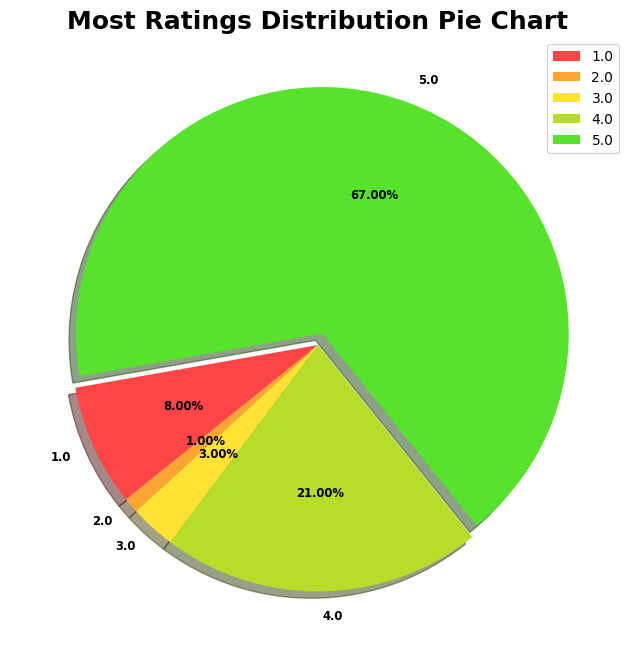

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       explode = [0.00,0.0,0.0,0.0,0.05],
       autopct= '%.2f%%',
        colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

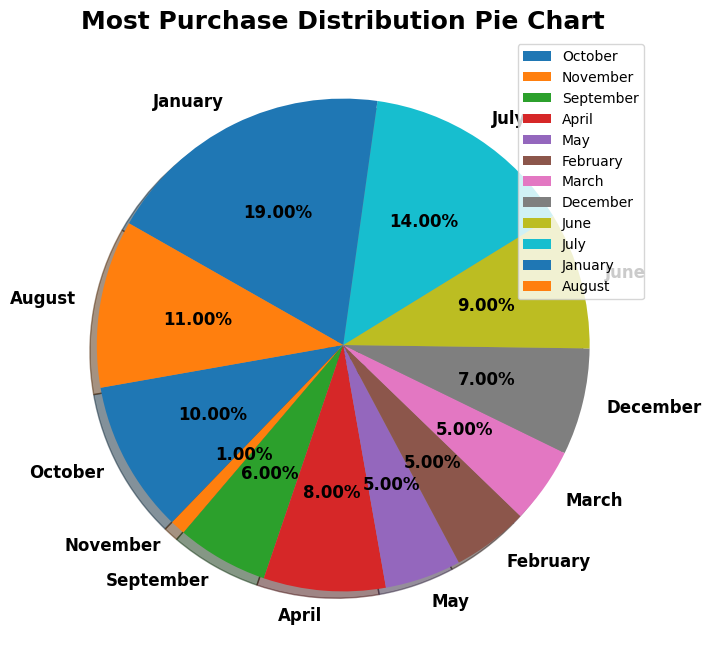

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts().sort_index(),
        labels=df['Month'].value_counts().index,
        explode =None,
        autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'horizontal',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##**TEXT PRE_PROCESSING FOR SENTIMENTAL ANALYSIS**

In [ ]:
df1

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15,10,2023
1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21,12,2022
2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2,11,2022
3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20,9,2022
4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17,10,2023
...,...,...,...,...,...,...
95,4.0,4.0 out of 5 stars\nOverrated,Excellent phone but would not recommend to buy...,8,4,2023
96,4.0,4.0 out of 5 stars\nMore tweaked IPhone with l...,iPhone 14Pro is Blazing fast and does every ta...,9,2,2023
97,5.0,5.0 out of 5 stars\nAbout the device,I like the Device specially that floating notc...,14,7,2023
98,3.0,3.0 out of 5 stars\nIphone Vs Nokia????,I have used Iphones and also other android pho...,17,1,2023


In [ ]:
data = pd.DataFrame(reviewlist)
data

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nAn impressive device,An absolute beast of a device. Recommended for...,15 October 2023
1,5.0,5.0 out of 5 stars\nGood But Not That Much Good,Using Apple iPhone after 10 years. Really prod...,21 December 2022
2,5.0,5.0 out of 5 stars\nAndroid users point of view.,I was in doubt before investing such a huge am...,2 November 2022
3,4.0,"4.0 out of 5 stars\nThe good and the bad, Trus...",The Good: The software is extremely smooth and...,20 September 2022
4,5.0,5.0 out of 5 stars\nPower Packed - Insane Cams...,Just brilliant!,17 October 2023
...,...,...,...,...
95,4.0,4.0 out of 5 stars\nOverrated,Excellent phone but would not recommend to buy...,8 April 2023
96,4.0,4.0 out of 5 stars\nMore tweaked IPhone with l...,iPhone 14Pro is Blazing fast and does every ta...,9 February 2023
97,5.0,5.0 out of 5 stars\nAbout the device,I like the Device specially that floating notc...,14 July 2023
98,3.0,3.0 out of 5 stars\nIphone Vs Nokia????,I have used Iphones and also other android pho...,17 January 2023


In [ ]:
data.drop(['Rating'],axis=1,inplace=True)

In [ ]:
data.drop(['Title'],axis=1,inplace=True)

In [ ]:
data.drop(['Review_Date'],axis=1,inplace=True)

In [ ]:
data

,Review
0,An absolute beast of a device. Recommended for...
1,Using Apple iPhone after 10 years. Really prod...
2,I was in doubt before investing such a huge am...
3,The Good: The software is extremely smooth and...
4,Just brilliant!
...,...
95,Excellent phone but would not recommend to buy...
96,iPhone 14Pro is Blazing fast and does every ta...
97,I like the Device specially that floating notc...
98,I have used Iphones and also other android pho...


In [ ]:
import re
def cleaning (text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    #text = emoji.replace_emoji(text, replace='')
    return text

In [ ]:
data["Review"]=data["Review"].apply(cleaning)

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    for i in range(len(data)):
        lemmed = []
        words = word_tokenize(data['Review'].iloc[i])
        for w in words:
            lemmed.append(wordnet.lemmatize(w))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Review'] = data['lemmanized'].apply(' '.join)
    data=data.drop("lemmanized",axis=1)
    return data
data=lemm(data)

In [ ]:
data

,Review
0,an absolute beast of a device recommended for ...
1,using apple iphone after year really product i...
2,i wa in doubt before investing such a huge amo...
3,the good the software is extremely smooth and ...
4,just brilliant
...,...
95,excellent phone but would not recommend to buy...
96,iphone pro is blazing fast and doe every task ...
97,i like the device specially that floating notc...
98,i have used iphones and also other android pho...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment and assign labels
def analyze_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)

    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each row in the DataFrame
data['Sentiment'] = data['Review'].apply(analyze_sentiment)

# Display the DataFrame with sentiment labels
print(data[['Review', 'Sentiment']])

                                               Review Sentiment
0   an absolute beast of a device recommended for ...  Positive
1   using apple iphone after year really product i...  Positive
2   i wa in doubt before investing such a huge amo...  Positive
3   the good the software is extremely smooth and ...  Positive
4                                      just brilliant  Positive
..                                                ...       ...
95  excellent phone but would not recommend to buy...  Positive
96  iphone pro is blazing fast and doe every task ...  Positive
97  i like the device specially that floating notc...  Positive
98  i have used iphones and also other android pho...  Positive
99                                                      Neutral

[100 rows x 2 columns]


<Axes: xlabel='Sentiment', ylabel='count'>

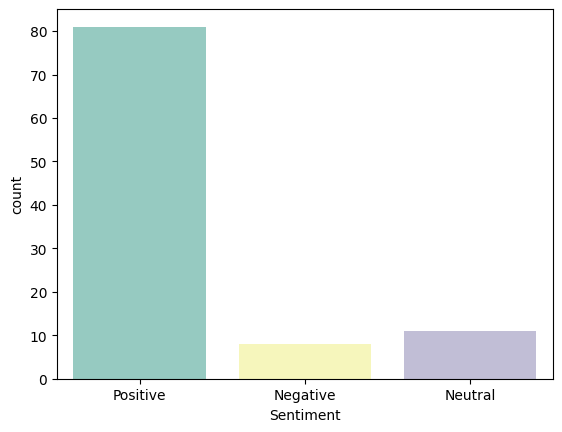

In [ ]:
import seaborn as sns
sns.countplot(x='Sentiment',data=data,palette="Set3")

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sentiment']=encoder.fit_transform(data['Sentiment'])
data

,Review,Sentiment
0,an absolute beast of a device recommended for ...,2
1,using apple iphone after year really product i...,2
2,i wa in doubt before investing such a huge amo...,2
3,the good the software is extremely smooth and ...,2
4,just brilliant,2
...,...,...
95,excellent phone but would not recommend to buy...,2
96,iphone pro is blazing fast and doe every task ...,2
97,i like the device specially that floating notc...,2
98,i have used iphones and also other android pho...,2


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
import string

removal = list(stopwords.words('english')) + list(string.punctuation)
stemmer = LancasterStemmer()
corpus = data['Review'].tolist()

# Apply stemming to the corpus
stemmed_corpus = []
for sentence in corpus:
    words = sentence.split()
    stemmed_words = [stemmer.stem(word) for word in words if word not in removal]
    stemmed_sentence = ' '.join(stemmed_words)
    stemmed_corpus.append(stemmed_sentence)

# Printing the length of the stemmed corpus
print(len(stemmed_corpus))


100


In [ ]:
#1-->neutral,2-->postive,0-->negative
pos=data[data['Sentiment']==2]
pos_list=pos['Review'].tolist()
neg=data[data['Sentiment']==0]
neg_list=neg['Review'].tolist()

In [ ]:
pos_all=''.join([word for sent in pos_list for word in sent])
print(pos_all)

an absolute beast of a device recommended for those apple lover who are awestruck by the simplicity and ease of use of iphones over the year iphones are meant to be upgraded after year of use and unlike android device not every year because they don t need to be the phone is magic the display the camera the battery backup everything is top notch i bought it at a time when pro is available but there is not much substantial difference between the two and plan on using it at least till iphone pro come outusing apple iphone after year really product is good in quality stability and feel sturdy display is really good very bright battery is really superb for user from android very quick charging while using w samsung original charger no heat no lagging no hanging i don t play game so no idea about that handling is easy dynamic island is very useful io software is really feel like half baked cookie while you connect in bluetooth earbuds and auto answering is in on it work perfect but once you

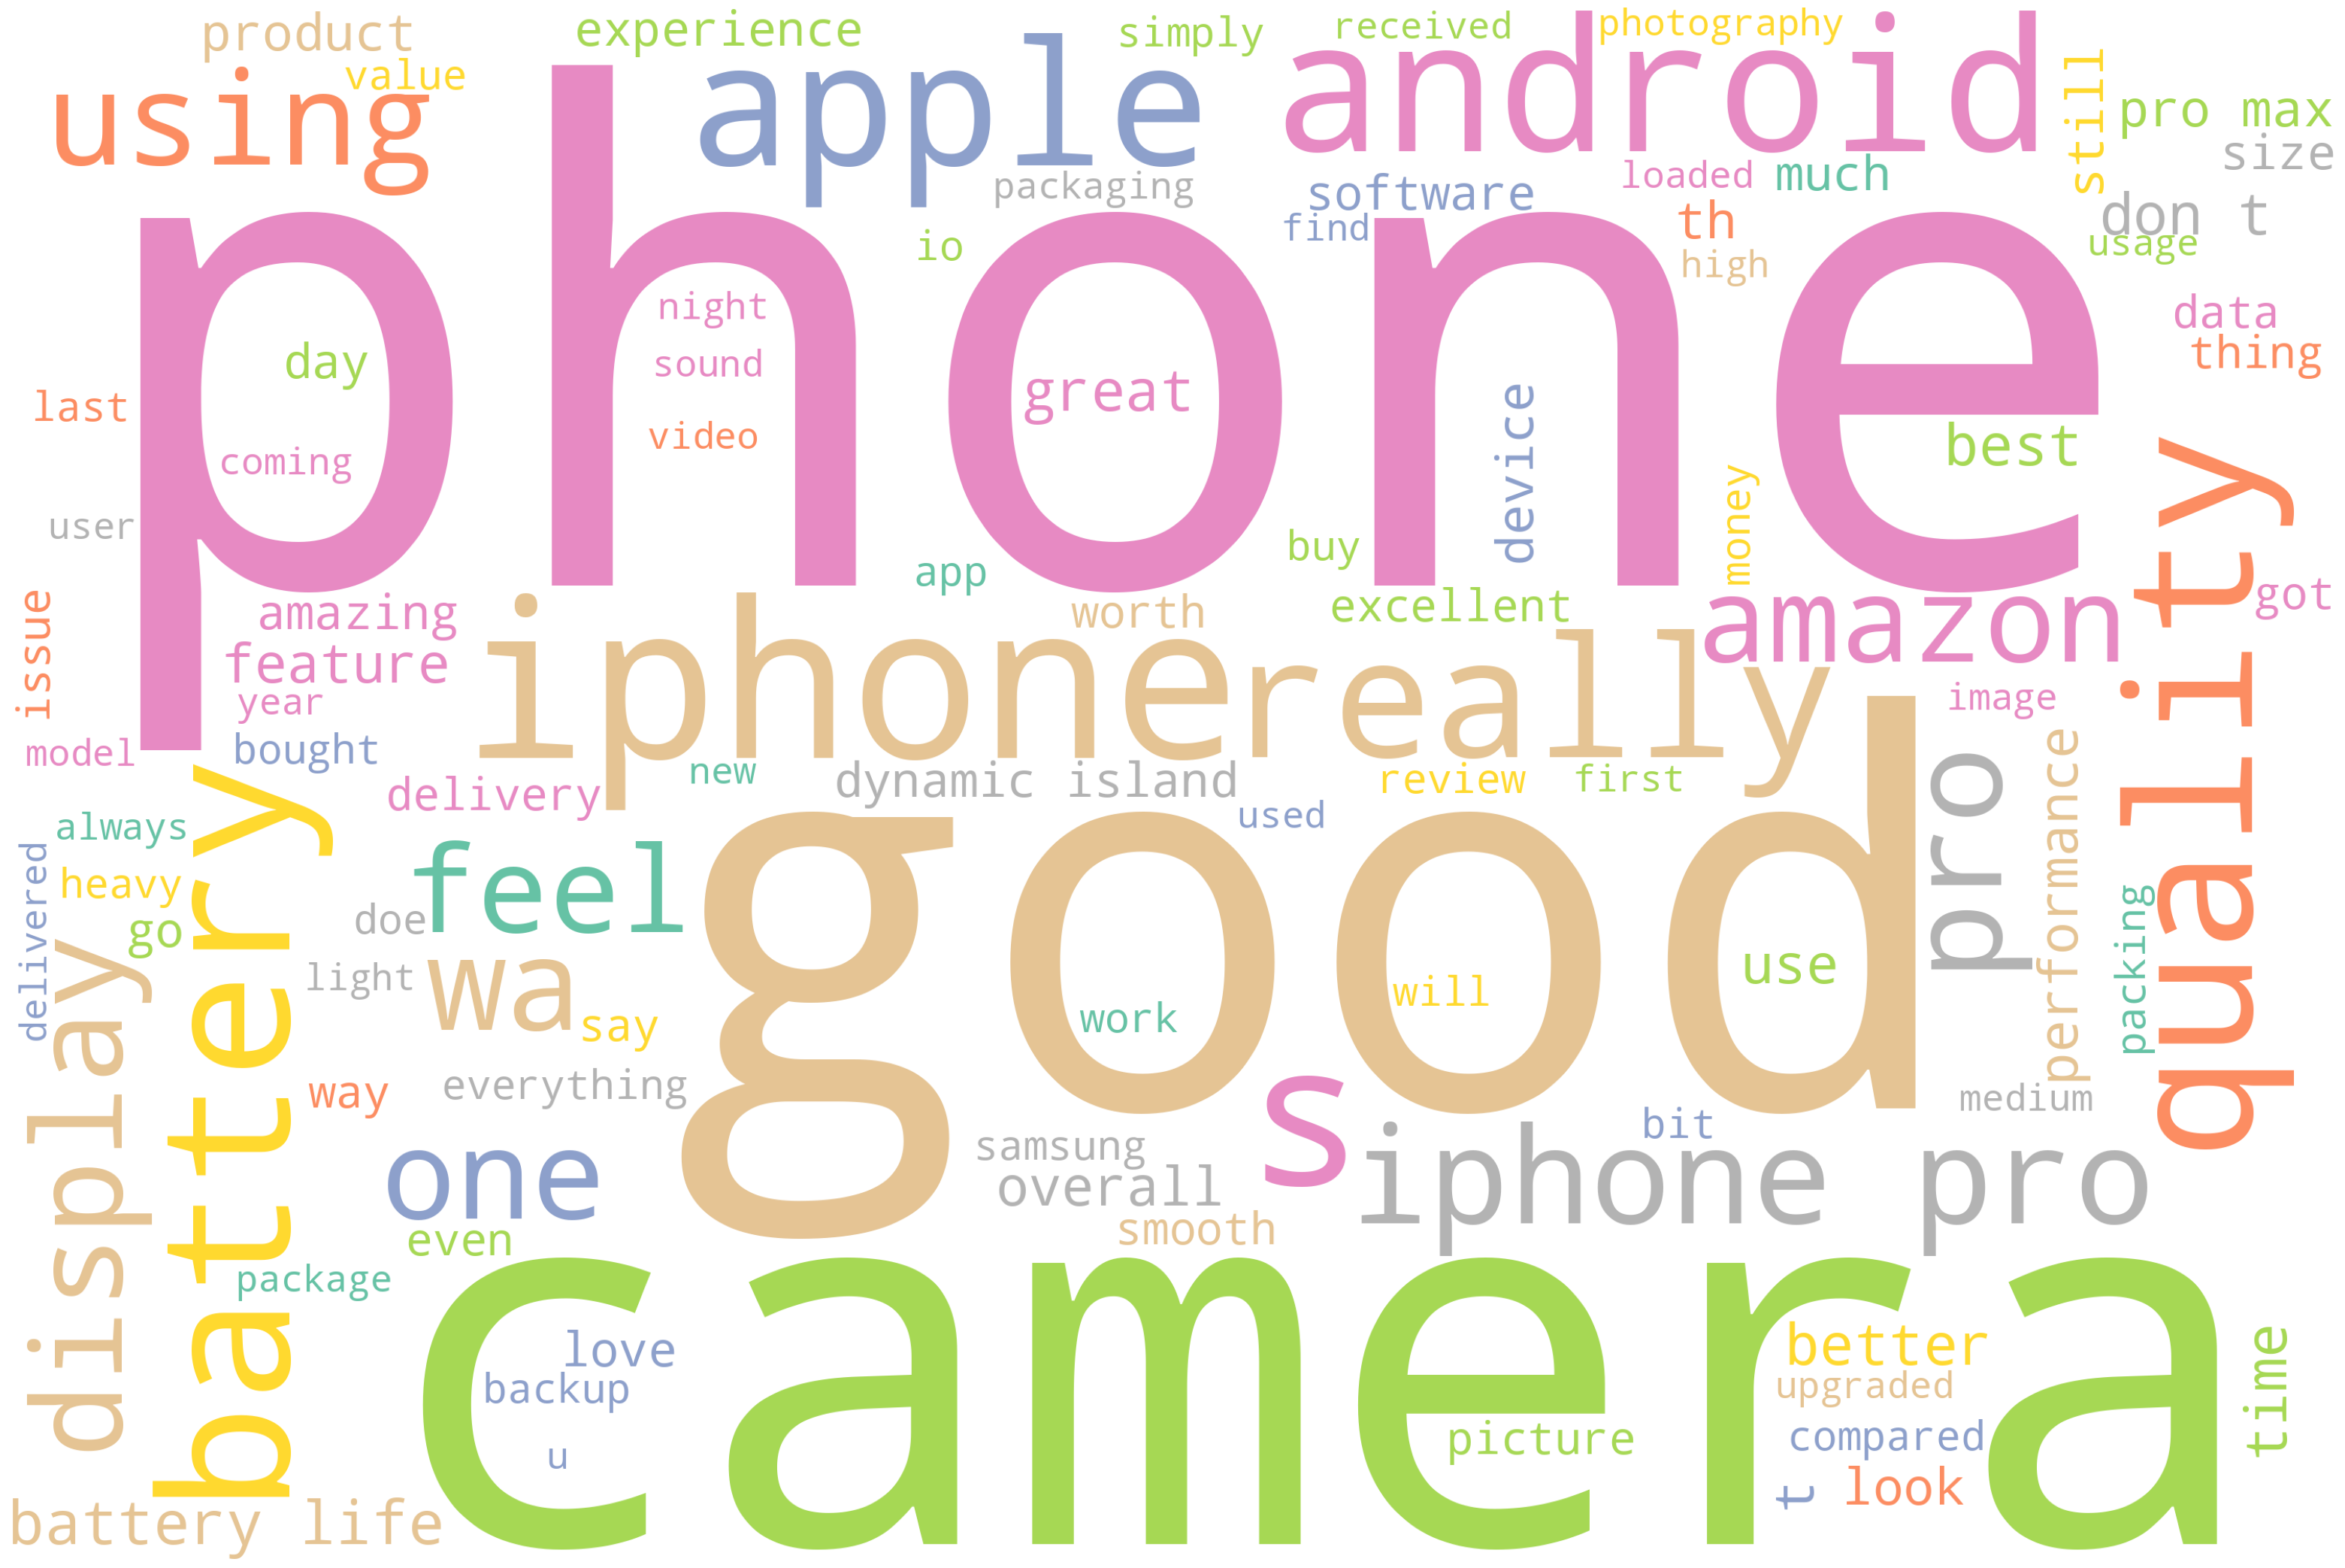

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(pos_all)
plot_cloud(wordcloud)

#**NAMED ENTITY RECOGONITION**

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=pos_all
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block:
    print(token,token.pos_)

an DET
absolute ADJ
beast NOUN
of ADP
a DET
device NOUN
recommended VERB
for ADP
those DET
apple PROPN
lover NOUN
who PRON
are AUX
awestruck VERB
by ADP
the DET
simplicity NOUN
and CCONJ
ease NOUN
of ADP
use NOUN
of ADP
iphones NOUN
over ADP
the DET
year NOUN
iphones NOUN
are AUX
meant VERB
to PART
be AUX
upgraded VERB
after ADP
year NOUN
of ADP
use NOUN
and CCONJ
unlike ADP
android ADJ
device NOUN
not PART
every DET
year NOUN
because SCONJ
they PRON
don VERB
t PROPN
need VERB
to PART
be AUX
the DET
phone NOUN
is AUX
magic ADJ
the DET
display NOUN
the DET
camera NOUN
the DET
battery NOUN
backup NOUN
everything PRON
is AUX
top ADJ
notch NOUN
i PRON
bought VERB
it PRON
at ADP
a DET
time NOUN
when SCONJ
pro ADJ
is AUX
available ADJ
but CCONJ
there PRON
is VERB
not PART
much ADV
substantial ADJ
difference NOUN
between ADP
the DET
two NUM
and CCONJ
plan NOUN
on ADP
using VERB
it PRON
at ADP
least ADJ
till SCONJ
iphone PROPN
pro ADV
come VERB
outusing VERB
apple NOUN
iphone NOUN
after ADP
ye

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['beast', 'device', 'recommended', 'lover', 'awestruck', 'simplicity', 'ease', 'use', 'iphones', 'year', 'iphones', 'meant', 'upgraded', 'year', 'use', 'device', 'year', 'don', 'need', 'phone', 'display', 'camera', 'battery', 'backup', 'notch', 'bought', 'time', 'is', 'difference', 'plan', 'using', 'come', 'outusing', 'apple', 'iphone', 'year', 'product', 'quality', 'stability', 'feel', 'display', 'battery', 'user', 'charging', 'using', 'charger', 'heat', 'lagging', 'hanging', 'don', 'play', 'game', 'idea', 'handling', 'island', 'software', 'feel', 'half', 'baked', 'cookie', 'connect', 'earbuds', 'auto', 'answering', 'work', 'switch', 'auto', 'answering', 'work', 'need', 'switch', 'auto', 'answering', 'call', 'receive', 'message', 'ear', 'drum', 'affected', 'sound', 'g', 'coming', 'packing', 'amazon', 'doe', 'job', 'packing', 'received', 'amazon', 'printed', 'plastic', 'cover', 'send', 'message', 'shipping', 'iphone', 'packed', 'shipped', 'receiving', 'packing', 'time', 'deliveryi', 'd

In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df # viewing top ten results


,word,count
0,phone,53
1,iphone,32
2,camera,29
3,battery,26
4,quality,15
...,...,...
541,person,1
542,stuff,1
543,opinion,1
544,tried,1


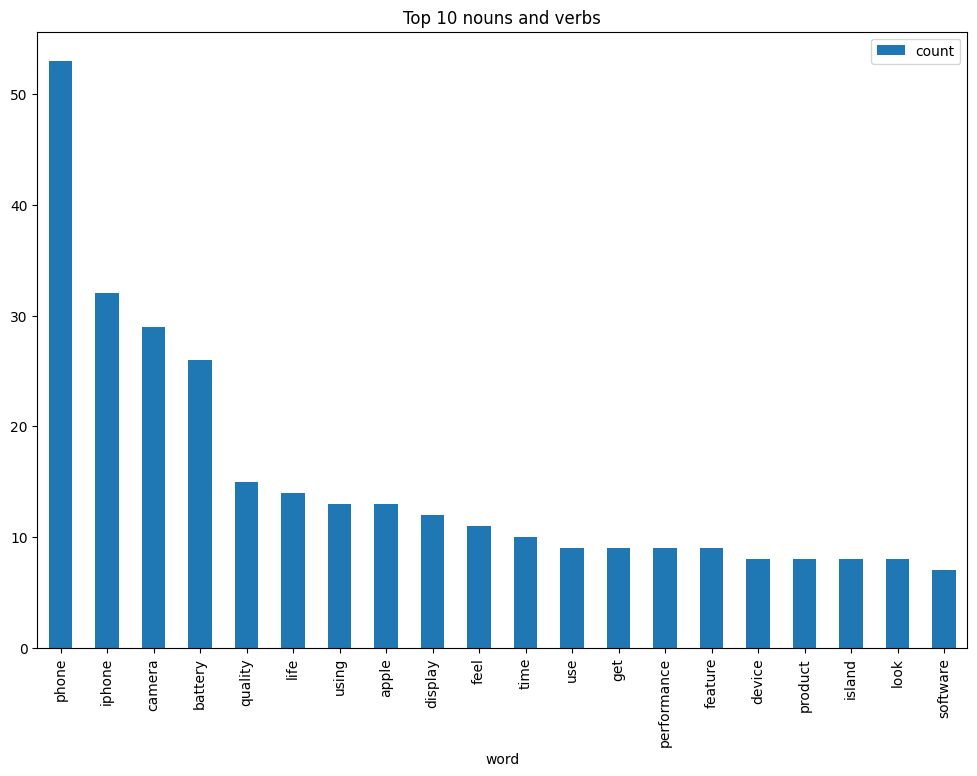

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:20].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [ ]:
from google.colab import files
upload = files.upload()


Saving Afinn.csv to Afinn (2).csv


In [ ]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# manual testing
calculate_sentiment(text='great')

3